<a href="https://colab.research.google.com/github/faizankaleem664/DiseasePrediction/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The** link of the dataset used here is given in the channel description box.


In [ ]:
#Import required Libraries
import numpy as np
import pandas as pd

# 1.Load the dataset
NOTE: Here we are using diabetes dataset. The target variable has two classes, whether the person having diabetes (represented by label 'yes') or not (represented by label 'no')

In [ ]:
# Importing the dataset
# Upload the Dataset on colab
from google.colab import files
uploaded=files.upload()




Saving diabetes_N.csv to diabetes_N (1).csv


In [ ]:
#Read the dataset
data_S = pd.read_csv('diabetes_N (1).csv')



In [ ]:
data_S.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


In [ ]:
# Using the following function, we can know about the number of instances that belongs to each category
data_S.groupby('Outcome').size()

Outcome
no     488
yes    280
dtype: int64

# 2. Dataset Description

In [ ]:
data_S.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#3. Splitting the dataset

In [ ]:
#Split the dataset into features and target variable or labels
X=data_S.iloc[:,0:7].values
Y=data_S.iloc[:,8].values

In [ ]:
print(X[:,1])

[148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 115. 126.  99. 196. 119. 143. 125. 147.  97.
 145. 117. 109. 158.  88.  92. 122. 103. 138. 102.  90. 111. 180. 133.
 106. 171. 159. 180. 146.  71. 103. 105. 103. 101.  88. 176. 150.  73.
 187. 100. 146. 105.  84. 133.  44. 141. 114.  99. 109. 109.  95. 146.
 100. 139. 126. 129.  79.   0.  62.  95. 131. 112. 113.  74.  83. 101.
 137. 110. 106. 100. 136. 107.  80. 123.  81. 134. 142. 144.  92.  71.
  93. 122. 163. 151. 125.  81.  85. 126.  96. 144.  83.  95. 171. 155.
  89.  76. 160. 146. 124.  78.  97.  99. 162. 111. 107. 132. 113.  88.
 120. 118. 117. 105. 173. 122. 170.  84.  96. 125. 100.  93. 129. 105.
 128. 106. 108. 108. 154. 102.  57. 106. 147.  90. 136. 114. 156. 153.
 188. 152.  99. 109.  88. 163. 151. 102. 114. 100. 131. 104. 148. 120.
 110. 111. 102. 134.  87.  79.  75. 179.  85. 129. 143. 130.  87. 119.
   0.  73. 141. 194. 181. 128. 109. 139. 111. 123. 159. 135.  85. 158.
 105. 

# 4. Label Encoding
Note: As we know that, in this dataset, labels/target variable is categorical,
but the machine learning (ML) models do not process the string labels or categorical data, ML models accepts only numerical values. Hence, we will use Label Encoder to convert labels into numbers. yes to 1, and no to 0.

In [ ]:
from sklearn.preprocessing import LabelEncoder
LEncoder =LabelEncoder()
y=LEncoder.fit_transform(Y)


#5. Split dataset into train set and test set
Note: We will split X (input feature matrix) into train set and test set, similarly Y (targer variables/ Labels) into train set and test set.

In [ ]:
#Splitting dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 6. Feature scaling of Independent features (input feature matrix X)

In [ ]:
#Feature scaling for classification
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 7. Training & predicting for classification

In [ ]:
#Training & predicting for classification
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=23)
#Fitting the model to the training data
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0]


In [ ]:
#Evaluating the accuracy
acc =  classifier.score(X_test, y_test)
print(acc)

0.7291666666666666


              precision    recall  f1-score   support

           0       0.73      0.88      0.80       116
           1       0.73      0.50      0.59        76

    accuracy                           0.73       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.73      0.73      0.72       192



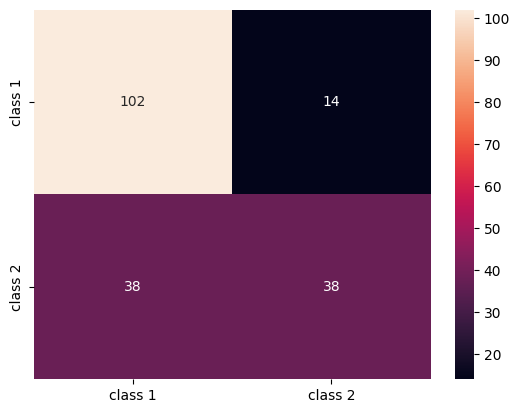

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  columns=classes_names, index = classes_names)

# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

#8. Finding best value of K for maximizing the F1-score

In [ ]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 2 classes
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1-Score')

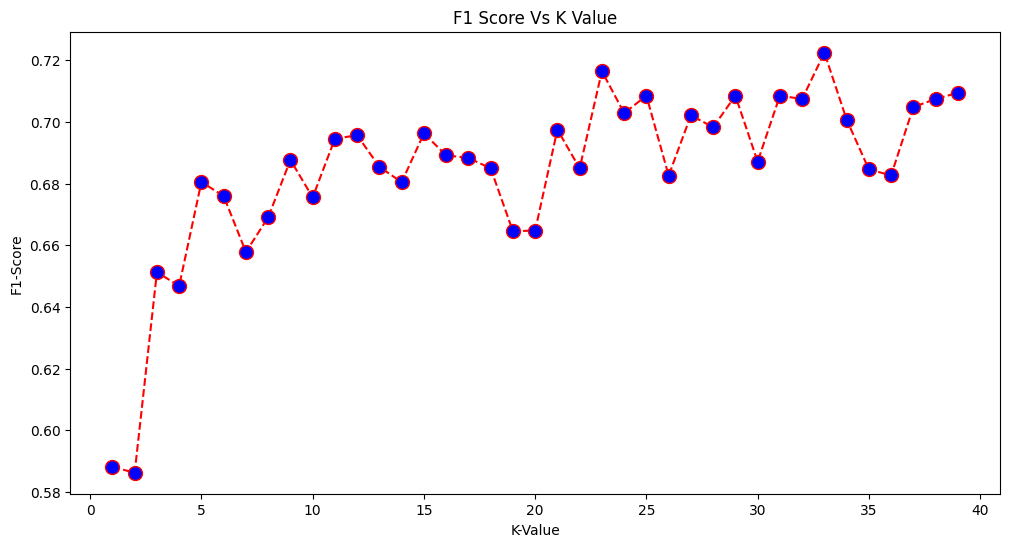

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score Vs K Value')
plt.xlabel('K-Value')
plt.ylabel('F1-Score')